<a href="https://colab.research.google.com/github/OFAslan/Python_Simple_Projects/blob/main/YS_ADS_June14_July12_July26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

data=pd.read_excel("/content/PZ_segmentasyon.xlsx")
data.head()

,cinsiyet,yas,il,semt,uyelik_tarihi,ilk_satın_alma,son_satın_alma,sipariş_adedi,toplam_harcama,toplam_indirim_tutarı
0,Erkek,35.0,İSTANBUL,SARIYER,2023-01-22,2023-02-26,2023-03-12,2,272.5,25
1,Kadın,32.0,İSTANBUL,ŞİŞLİ,2023-01-22,2023-01-22,2023-04-17,4,494.5,25
2,Erkek,19.0,İSTANBUL,ZEYTİNBURNU,2023-03-10,2023-03-26,2023-03-26,1,87.0,25
3,Erkek,27.0,İSTANBUL,BAŞAKŞEHİR,2023-03-07,2023-03-07,2023-03-07,1,50.5,25
4,Kadın,43.0,İSTANBUL,BEŞİKTAŞ,2023-01-15,2023-01-15,2023-01-15,1,47.0,25


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   cinsiyet               182 non-null    object        
 1   yas                    174 non-null    float64       
 2   il                     187 non-null    object        
 3   semt                   187 non-null    object        
 4   uyelik_tarihi          187 non-null    datetime64[ns]
 5   ilk_satın_alma         187 non-null    datetime64[ns]
 6   son_satın_alma         187 non-null    datetime64[ns]
 7   sipariş_adedi          187 non-null    int64         
 8   toplam_harcama         187 non-null    float64       
 9   toplam_indirim_tutarı  187 non-null    int64         
dtypes: datetime64[ns](3), float64(2), int64(2), object(3)
memory usage: 14.7+ KB


Ortalama yaş
Ortalama harcama


In [ ]:
data.describe()

,yas,sipariş_adedi,toplam_harcama,toplam_indirim_tutarı
count,174.000000,187.000000,187.000000,187.000000
mean,39.293103,2.486631,566.147219,27.540107
std,12.874236,3.218492,980.933653,20.999033
min,10.000000,1.000000,45.000000,25.000000
25%,30.250000,1.000000,95.000000,25.000000
50%,37.000000,1.000000,202.500000,25.000000
75%,46.750000,2.000000,543.450000,25.000000
max,78.000000,29.000000,6331.250000,300.000000


<Axes: >

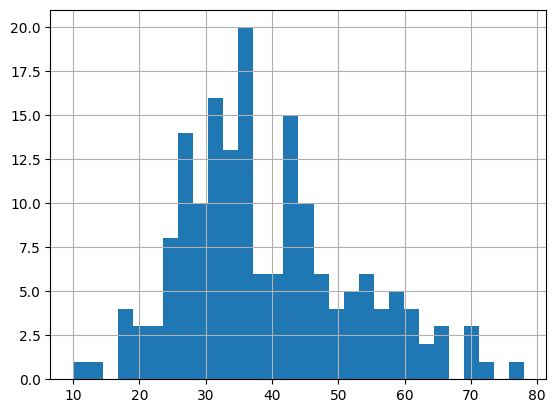

In [ ]:
data["yas"].hist(bins=30)

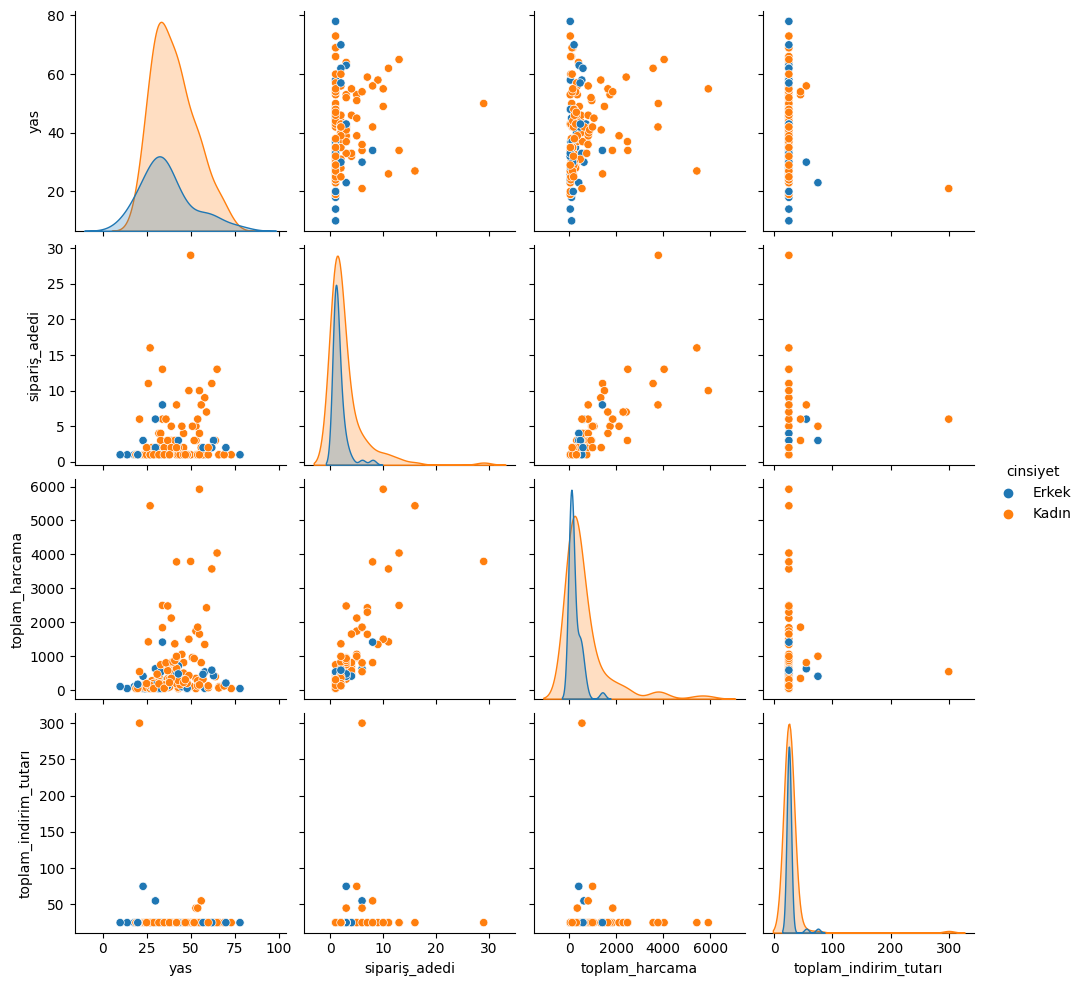

In [ ]:
import seaborn as sns

sns.pairplot(data, hue="cinsiyet")

In [ ]:
# AOV: Average Order Value

data["AOV"] = data["toplam_harcama"]/data["sipariş_adedi"]
data.AOV

0      136.2500
1      123.6250
2       87.0000
3       50.5000
4       47.0000
         ...   
182    498.2500
183    295.0000
184    309.0000
185     64.7500
186    472.5625
Name: AOV, Length: 187, dtype: float64

In [ ]:
from datetime import datetime
import matplotlib.pyplot as plt

current_date = datetime(2023, 5, 2)
current_date

datetime.datetime(2023, 5, 2, 0, 0)

In [ ]:
data["Total_Life_Time"] = current_date - data["uyelik_tarihi"]
data["Total_Life_Time"]

0     100 days
1     100 days
2      53 days
3      56 days
4     107 days
        ...   
182   102 days
183   114 days
184    97 days
185   115 days
186   112 days
Name: Total_Life_Time, Length: 187, dtype: timedelta64[ns]

(array([ 2.,  6.,  4.,  4.,  1.,  9.,  4., 13.,  7.,  7.,  6., 11.,  6.,
        16., 14., 12., 14., 15., 19., 17.]),
 array([ 21.,  26.,  31.,  36.,  41.,  46.,  51.,  56.,  61.,  66.,  71.,
         76.,  81.,  86.,  91.,  96., 101., 106., 111., 116., 121.]),
 <BarContainer object of 20 artists>)

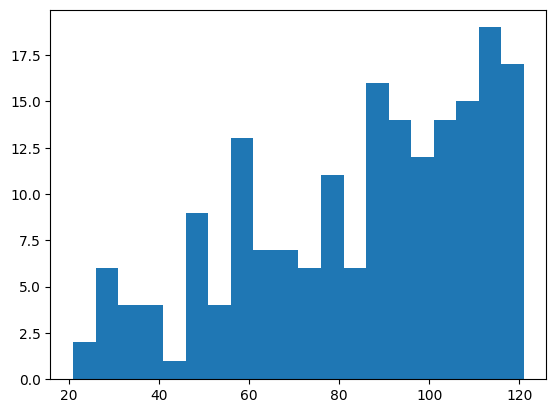

In [ ]:
plt.hist(data["Total_Life_Time"].dt.days, bins=20)

<Axes: >

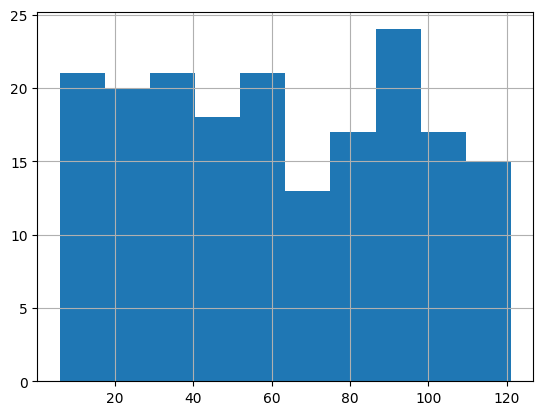

In [ ]:
data["Recency"] = (current_date - data["son_satın_alma"]).dt.days
data["Recency"].hist()

<Axes: >

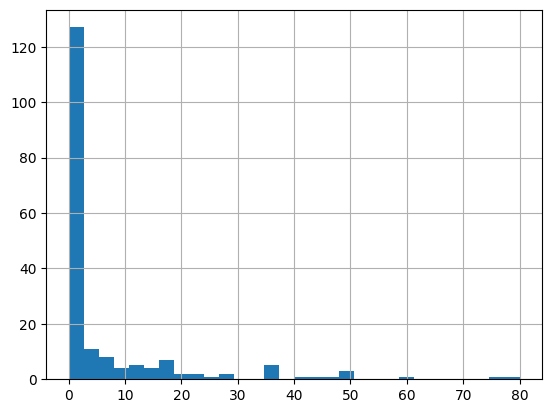

In [ ]:
data["First_Order_Lag"] = (data["ilk_satın_alma"]-data["uyelik_tarihi"]).dt.days
data["First_Order_Lag"].hist(bins=30)

In [ ]:
data["age_segment"] = pd.qcut(data["yas"], q=4)
data["age_segment"]

0       (30.25, 37.0]
1       (30.25, 37.0]
2      (9.999, 30.25]
3      (9.999, 30.25]
4       (37.0, 46.75]
            ...      
182     (37.0, 46.75]
183     (46.75, 78.0]
184     (46.75, 78.0]
185     (46.75, 78.0]
186     (37.0, 46.75]
Name: age_segment, Length: 187, dtype: category
Categories (4, interval[float64, right]): [(9.999, 30.25] < (30.25, 37.0] < (37.0, 46.75] <
                                           (46.75, 78.0]]

In [ ]:
pd.pivot_table(data, values="AOV",index="age_segment", aggfunc="mean")

,AOV
age_segment,
"(9.999, 30.25]",108.855064
"(30.25, 37.0]",185.699105
"(37.0, 46.75]",247.111779
"(46.75, 78.0]",223.750893


In [ ]:
pd.pivot_table(data, values="AOV",index="age_segment", aggfunc="count")

,AOV
age_segment,
"(9.999, 30.25]",44
"(30.25, 37.0]",49
"(37.0, 46.75]",37
"(46.75, 78.0]",44


<Axes: xlabel='age_segment'>

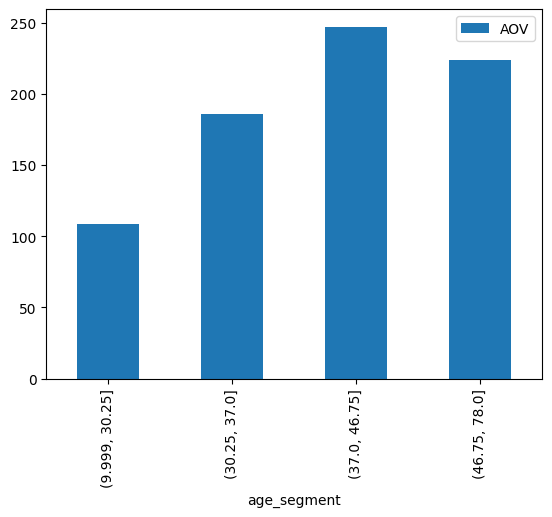

In [ ]:
pd.pivot_table(data, values="AOV",index="age_segment", aggfunc="mean").plot(kind="bar")

In [ ]:
pd.pivot_table(data, values="AOV",index="age_segment", columns="cinsiyet", aggfunc="mean")

cinsiyet,Erkek,Kadın
age_segment,,
"(9.999, 30.25]",94.377353,116.306646
"(30.25, 37.0]",136.139333,205.583317
"(37.0, 46.75]",201.750000,260.947930
"(46.75, 78.0]",169.120370,207.550175


In [ ]:
pd.pivot_table(data, values="AOV",index="age_segment", columns="cinsiyet", aggfunc="count")

cinsiyet,Erkek,Kadın
age_segment,,
"(9.999, 30.25]",17,26
"(30.25, 37.0]",15,32
"(37.0, 46.75]",5,31
"(46.75, 78.0]",9,34


In [ ]:
data.head()

,cinsiyet,yas,il,semt,uyelik_tarihi,ilk_satın_alma,son_satın_alma,sipariş_adedi,toplam_harcama,toplam_indirim_tutarı,AOV,Total_Life_Time,Recency,First_Order_Lag,age_segment
0,Erkek,35.0,İSTANBUL,SARIYER,2023-01-22,2023-02-26,2023-03-12,2,272.5,25,136.250,100 days,51,35,"(30.25, 37.0]"
1,Kadın,32.0,İSTANBUL,ŞİŞLİ,2023-01-22,2023-01-22,2023-04-17,4,494.5,25,123.625,100 days,15,0,"(30.25, 37.0]"
2,Erkek,19.0,İSTANBUL,ZEYTİNBURNU,2023-03-10,2023-03-26,2023-03-26,1,87.0,25,87.000,53 days,37,16,"(9.999, 30.25]"
3,Erkek,27.0,İSTANBUL,BAŞAKŞEHİR,2023-03-07,2023-03-07,2023-03-07,1,50.5,25,50.500,56 days,56,0,"(9.999, 30.25]"
4,Kadın,43.0,İSTANBUL,BEŞİKTAŞ,2023-01-15,2023-01-15,2023-01-15,1,47.0,25,47.000,107 days,107,0,"(37.0, 46.75]"


<Axes: >

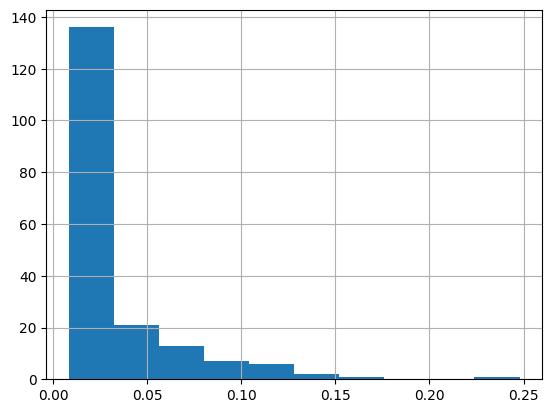

In [ ]:
# RFM: Recency, Frequency, Monetary

""" 64 segment
4
3
2
1
"""

data["Frequency"] = data["sipariş_adedi"]/data["Total_Life_Time"].dt.days
data["Frequency"].hist()

In [ ]:
data["R"] = pd.qcut(data["Recency"], q=4, labels=list(range(4,0,-1)))

In [ ]:
data["T"] = pd.qcut(data["Recency"], q=4, labels=list("ABCD"))
data["T"]

0      B
1      A
2      B
3      B
4      D
      ..
182    B
183    C
184    D
185    D
186    A
Name: T, Length: 187, dtype: category
Categories (4, object): ['A' < 'B' < 'C' < 'D']

<Axes: >

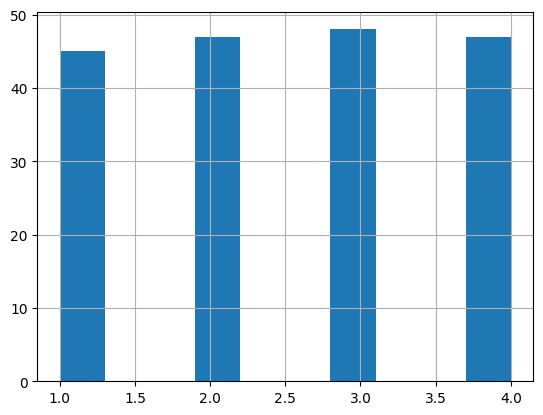

In [ ]:
data["R"].hist()

<Axes: >

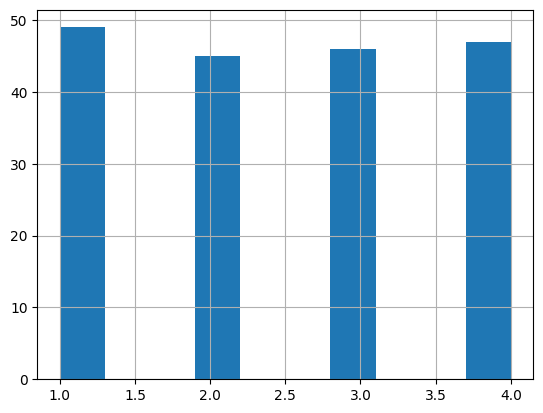

In [ ]:
data["F"] = pd.qcut(data["Frequency"], q=4, labels=list(range(1,5)))
data["F"].hist()

<Axes: >

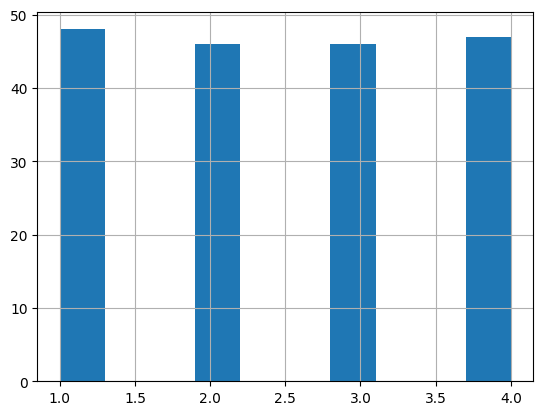

In [ ]:
data["M"] = pd.qcut(data["toplam_harcama"], q=4, labels=list(range(1,5)))
data["M"].hist()

In [ ]:
data.head()

,cinsiyet,yas,il,semt,uyelik_tarihi,ilk_satın_alma,son_satın_alma,sipariş_adedi,toplam_harcama,toplam_indirim_tutarı,AOV,Total_Life_Time,Recency,First_Order_Lag,age_segment,Frequency,R,T,F,M
0,Erkek,35.0,İSTANBUL,SARIYER,2023-01-22,2023-02-26,2023-03-12,2,272.5,25,136.250,100 days,51,35,"(30.25, 37.0]",0.020000,3,B,3,3
1,Kadın,32.0,İSTANBUL,ŞİŞLİ,2023-01-22,2023-01-22,2023-04-17,4,494.5,25,123.625,100 days,15,0,"(30.25, 37.0]",0.040000,4,A,4,3
2,Erkek,19.0,İSTANBUL,ZEYTİNBURNU,2023-03-10,2023-03-26,2023-03-26,1,87.0,25,87.000,53 days,37,16,"(9.999, 30.25]",0.018868,3,B,3,1
3,Erkek,27.0,İSTANBUL,BAŞAKŞEHİR,2023-03-07,2023-03-07,2023-03-07,1,50.5,25,50.500,56 days,56,0,"(9.999, 30.25]",0.017857,3,B,3,1
4,Kadın,43.0,İSTANBUL,BEŞİKTAŞ,2023-01-15,2023-01-15,2023-01-15,1,47.0,25,47.000,107 days,107,0,"(37.0, 46.75]",0.009346,1,D,1,1


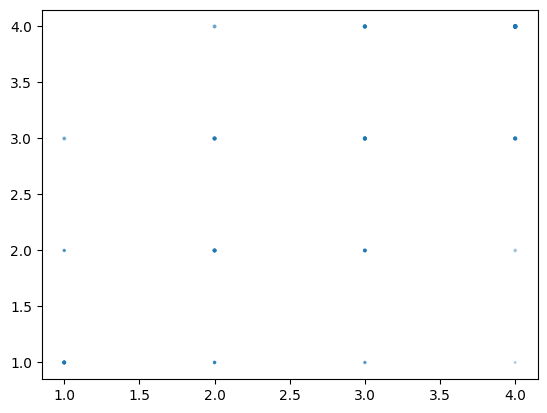

In [ ]:
plt.scatter(data["R"], data["F"], s=data["M"], alpha=0.3)

In [ ]:
pd.pivot_table(data, values="AOV",index=["M","R"], columns="F", aggfunc="count")

F     1   2  3   4
M R               
1 4   1   0  1   1
  3   2   6  7   0
  2   1  14  0   0
  1  15   0  0   0
2 4   0   0  1   1
  3   0   1  6   0
  2   3   9  3   0
  1  18   3  1   0
3 4   0   1  3   8
  3   1   3  9   2
  2   1   6  4   1
  1   7   0  0   0
4 4   0   0  4  26
  3   0   1  3   7
  2   0   1  3   1
  1   0   0  1   0

In [ ]:
def join_rfm(x):
  return(str(x["R"])+str(x["F"])+str(x["M"]))

data["segment"] = data.apply(join_rfm, axis=1)
data["rfm_score"] = data[["R","F","M"]].sum(axis=1)
data.head()

,cinsiyet,yas,il,semt,uyelik_tarihi,ilk_satın_alma,son_satın_alma,sipariş_adedi,toplam_harcama,toplam_indirim_tutarı,...,Recency,First_Order_Lag,age_segment,Frequency,R,T,F,M,segment,rfm_score
0,Erkek,35.0,İSTANBUL,SARIYER,2023-01-22,2023-02-26,2023-03-12,2,272.5,25,...,51,35,"(30.25, 37.0]",0.020000,3,B,3,3,333,9
1,Kadın,32.0,İSTANBUL,ŞİŞLİ,2023-01-22,2023-01-22,2023-04-17,4,494.5,25,...,15,0,"(30.25, 37.0]",0.040000,4,A,4,3,443,11
2,Erkek,19.0,İSTANBUL,ZEYTİNBURNU,2023-03-10,2023-03-26,2023-03-26,1,87.0,25,...,37,16,"(9.999, 30.25]",0.018868,3,B,3,1,331,7
3,Erkek,27.0,İSTANBUL,BAŞAKŞEHİR,2023-03-07,2023-03-07,2023-03-07,1,50.5,25,...,56,0,"(9.999, 30.25]",0.017857,3,B,3,1,331,7
4,Kadın,43.0,İSTANBUL,BEŞİKTAŞ,2023-01-15,2023-01-15,2023-01-15,1,47.0,25,...,107,0,"(37.0, 46.75]",0.009346,1,D,1,1,111,3


In [ ]:
X = data[["Frequency","AOV","Recency"]]

In [ ]:
X.head()

,Frequency,AOV,Recency
0,0.020000,136.250,51
1,0.040000,123.625,15
2,0.018868,87.000,37
3,0.017857,50.500,56
4,0.009346,47.000,107


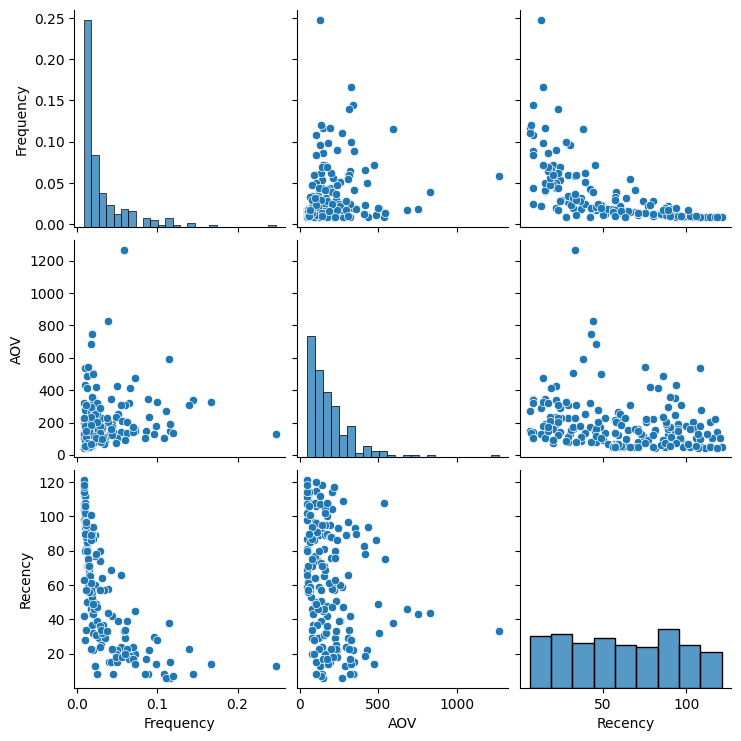

In [ ]:
sns.pairplot(X)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[4.89799528e-02, 7.47185261e-02, 3.91304348e-01],
       [1.32452830e-01, 6.43807574e-02, 7.82608696e-02],
       [4.42550730e-02, 3.43909928e-02, 2.69565217e-01],
       [4.00364303e-02, 4.50358240e-03, 4.34782609e-01],
       [4.51309293e-03, 1.63766633e-03, 8.78260870e-01],
       [1.40378181e-02, 2.78403275e-02, 5.65217391e-01],
       [2.11798659e-03, 1.29785056e-01, 9.39130435e-01],
       [9.90754215e-03, 1.63766633e-01, 7.56521739e-01],
       [2.04234422e-02, 1.28556807e-01, 6.08695652e-01],
       [3.50678066e-02, 1.46980553e-01, 4.69565217e-01],
       [2.15925708e-01, 2.14397816e-01, 2.00000000e-01],
       [9.59334463e-02, 9.62128966e-02, 2.26086957e-01],
       [1.40870263e-01, 2.48352098e-01, 7.82608696e-02],
       [4.51309293e-03, 1.08085977e-01, 8.78260870e-01],
       [3.79738619e-03, 1.90788127e-01, 8.95652174e-01],
       [1.48561631e-01, 1.20941658e-01, 1.39130435e-01],
       [3.44929245e-03, 3.68474923e-03, 9.04347826e-01],
       [8.14416274e-02, 5.81371

In [ ]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
SS_list = []
for n_clusters in range_n_clusters:

    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X_scaled)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    SS_list.append(silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.4999733312399179
For n_clusters = 3 The average silhouette_score is : 0.4171913799199949
For n_clusters = 4 The average silhouette_score is : 0.4078780374402632
For n_clusters = 5 The average silhouette_score is : 0.43181328621904247
For n_clusters = 6 The average silhouette_score is : 0.37859384735226564
For n_clusters = 7 The average silhouette_score is : 0.3750428776866843
For n_clusters = 8 The average silhouette_score is : 0.3621917169739679
For n_clusters = 9 The average silhouette_score is : 0.3705225455548665
For n_clusters = 10 The average silhouette_score is : 0.34467051094807866


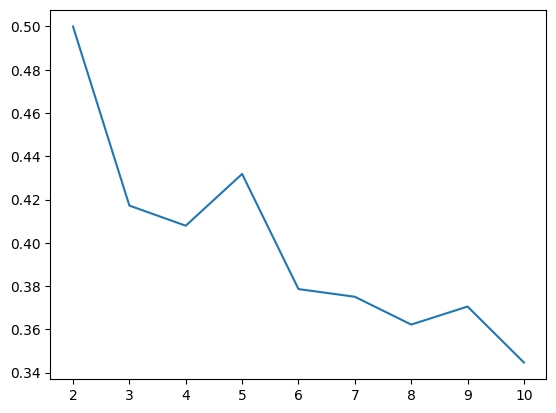

In [ ]:
plt.plot(range_n_clusters, SS_list)

In [ ]:
clusterer5 = KMeans(n_clusters=5, n_init="auto", random_state=10)
cluster_labels5 = clusterer5.fit_predict(X_scaled)

In [ ]:
data["cluster"]=cluster_labels5

In [ ]:
pd.pivot_table(data, values="AOV",index="cluster", columns="cinsiyet", aggfunc="mean")

cinsiyet,Erkek,Kadın
cluster,,
0,125.398810,159.405702
1,132.686154,161.595263
2,138.987857,221.814252
3,140.312500,249.186963
4,NaN,753.455556


In [ ]:
pd.pivot_table(data, values="Recency",index="cluster", columns="cinsiyet", aggfunc="mean")

cinsiyet,Erkek,Kadın
cluster,,
0,57.857143,61.631579
1,99.384615,98.473684
2,23.000000,26.358974
3,11.000000,16.200000
4,NaN,44.333333


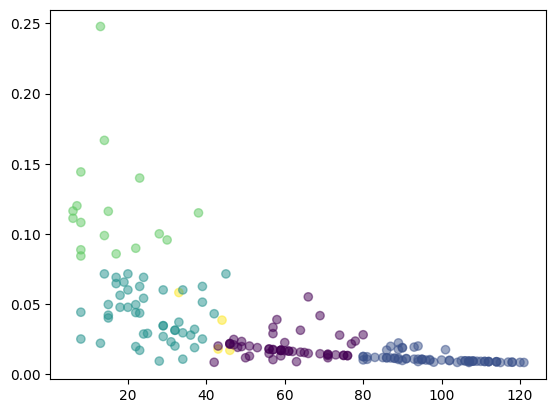

In [ ]:
plt.scatter(data["Recency"],data["Frequency"],c=data["cluster"],alpha=0.5)

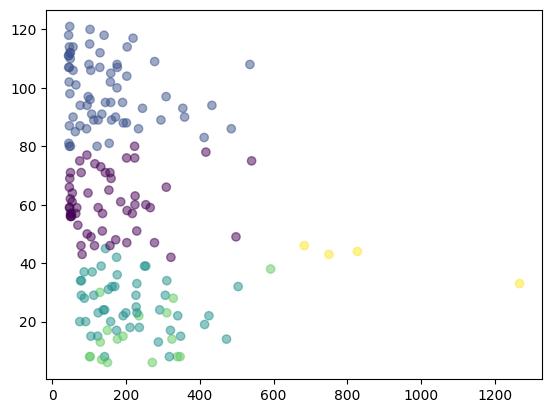

In [ ]:
plt.scatter(data["AOV"],data["Recency"],c=data["cluster"],alpha=0.5)

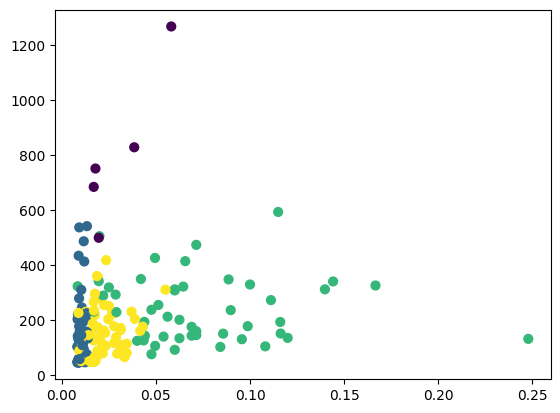

In [ ]:
from sklearn import mixture
gmm = mixture.GaussianMixture(n_components=4, covariance_type='full')
gmm.fit(X_scaled)
labels = gmm.predict(X_scaled)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, s=40, cmap='viridis');

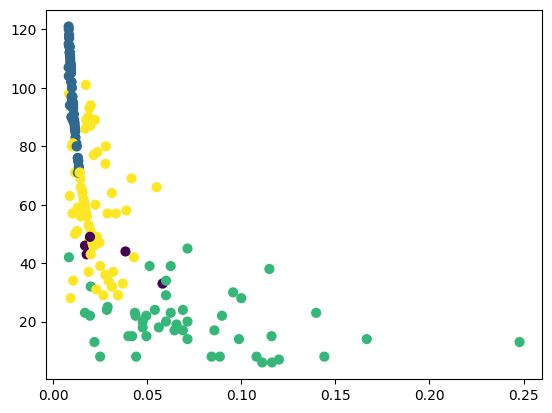

In [ ]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 2], c=labels, s=40, cmap='viridis');

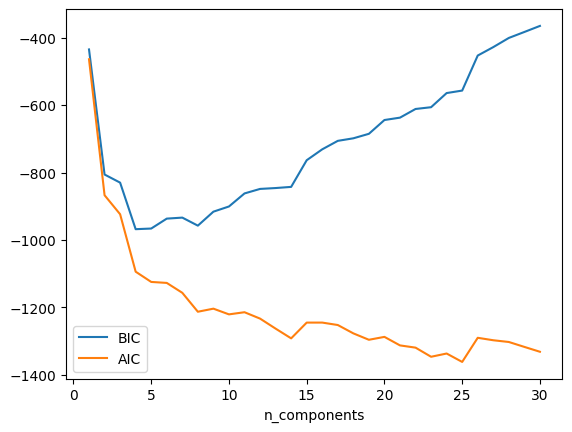

In [ ]:
n_components = np.arange(1, 31)
models = [mixture.GaussianMixture(n, covariance_type='full', random_state=0).fit(X_scaled)
          for n in n_components]

plt.plot(n_components, [m.bic(X_scaled) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X_scaled) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

In [ ]:
pd.pivot_table(data, values="Recency",index=labels, columns="cinsiyet", aggfunc="mean")

cinsiyet,Erkek,Kadın
0,NaN,45.500000
1,99.217391,97.250000
2,15.714286,21.047619
3,62.368421,57.274510


In [ ]:
pd.pivot_table(data, values="sipariş_adedi",index=labels, columns="cinsiyet", aggfunc="mean")

cinsiyet,Erkek,Kadın
0,NaN,2.000000
1,1.000000,1.000000
2,3.714286,5.904762
3,1.578947,1.627451


In [ ]:
pd.pivot_table(data, values="sipariş_adedi",index=labels, columns="cinsiyet", aggfunc="count")

cinsiyet,Erkek,Kadın
0,NaN,4.0
1,23.0,36.0
2,7.0,42.0
3,19.0,51.0


In [ ]:
pd.pivot_table(data, values="toplam_harcama",index=labels, columns="cinsiyet", aggfunc="mean")

cinsiyet,Erkek,Kadın
0,NaN,1398.600000
1,135.217391,162.621389
2,533.998571,1474.163810
3,222.254737,274.584902


In [ ]:
data.head()

,cinsiyet,yas,il,semt,uyelik_tarihi,ilk_satın_alma,son_satın_alma,sipariş_adedi,toplam_harcama,toplam_indirim_tutarı,...,First_Order_Lag,age_segment,Frequency,R,T,F,M,segment,rfm_score,cluster
0,Erkek,35.0,İSTANBUL,SARIYER,2023-01-22,2023-02-26,2023-03-12,2,272.5,25,...,35,"(30.25, 37.0]",0.020000,3,B,3,3,333,9,0
1,Kadın,32.0,İSTANBUL,ŞİŞLİ,2023-01-22,2023-01-22,2023-04-17,4,494.5,25,...,0,"(30.25, 37.0]",0.040000,4,A,4,3,443,11,2
2,Erkek,19.0,İSTANBUL,ZEYTİNBURNU,2023-03-10,2023-03-26,2023-03-26,1,87.0,25,...,16,"(9.999, 30.25]",0.018868,3,B,3,1,331,7,2
3,Erkek,27.0,İSTANBUL,BAŞAKŞEHİR,2023-03-07,2023-03-07,2023-03-07,1,50.5,25,...,0,"(9.999, 30.25]",0.017857,3,B,3,1,331,7,0
4,Kadın,43.0,İSTANBUL,BEŞİKTAŞ,2023-01-15,2023-01-15,2023-01-15,1,47.0,25,...,0,"(37.0, 46.75]",0.009346,1,D,1,1,111,3,1


In [ ]:
data["gmm_clusters"] = labels

In [ ]:
VIP_users  = data[data.segment == "444"]
VIP_users

,cinsiyet,yas,il,semt,uyelik_tarihi,ilk_satın_alma,son_satın_alma,sipariş_adedi,toplam_harcama,toplam_indirim_tutarı,...,age_segment,Frequency,R,T,F,M,segment,rfm_score,cluster,gmm_clusters
10,Kadın,34.0,İSTANBUL,SARIYER,2023-01-22,2023-01-25,2023-04-03,6,1841.00,25,...,"(30.25, 37.0]",0.060000,4,A,4,4,444,12,2,2
12,Kadın,53.0,İSTANBUL,KADIKÖY,2023-01-03,2023-01-03,2023-04-17,5,1741.50,25,...,"(46.75, 78.0]",0.042017,4,A,4,4,444,12,2,2
15,Kadın,51.0,İSTANBUL,ÜMRANİYE,2023-01-08,2023-01-08,2023-04-10,5,963.50,25,...,"(46.75, 78.0]",0.043860,4,A,4,4,444,12,2,2
18,Kadın,26.0,İSTANBUL,BAKIRKÖY,2023-01-07,2023-01-16,2023-04-02,11,1424.65,25,...,"(9.999, 30.25]",0.095652,4,A,4,4,444,12,3,2
25,Kadın,50.0,İSTANBUL,SARIYER,2023-01-05,2023-01-11,2023-04-19,29,3794.00,25,...,"(46.75, 78.0]",0.247863,4,A,4,4,444,12,3,2
32,Kadın,49.0,İSTANBUL,ŞİŞLİ,2023-02-05,2023-03-23,2023-04-26,10,1502.50,25,...,"(46.75, 78.0]",0.116279,4,A,4,4,444,12,3,2
33,Kadın,39.0,İSTANBUL,BEYKOZ,2023-01-21,2023-01-22,2023-04-10,5,2124.50,25,...,"(37.0, 46.75]",0.049505,4,A,4,4,444,12,2,2
39,Kadın,59.0,İSTANBUL,BEŞİKTAŞ,2023-02-12,2023-02-12,2023-04-24,7,2428.00,25,...,"(46.75, 78.0]",0.088608,4,A,4,4,444,12,3,2
44,Kadın,27.0,İSTANBUL,BAŞAKŞEHİR,2023-01-11,2023-01-11,2023-04-24,16,5433.00,25,...,"(9.999, 30.25]",0.144144,4,A,4,4,444,12,3,2
63,Kadın,NaN,İSTANBUL,MALTEPE,2023-02-13,2023-02-13,2023-04-10,7,1647.00,25,...,NaN,0.089744,4,A,4,4,444,12,3,2


In [ ]:
pd.pivot_table(VIP_users, values="toplam_harcama",index="gmm_clusters", columns="cluster", aggfunc="mean")

cluster,2,3
gmm_clusters,,
2,1452.847273,2255.753333


In [ ]:
pd.pivot_table(VIP_users, values="toplam_harcama",index="gmm_clusters", columns="cluster", aggfunc="count")

cluster,2,3
gmm_clusters,,
2,11,15


In [ ]:
pd.pivot_table(VIP_users, values="AOV",index="gmm_clusters", columns="cluster", aggfunc="mean")

cluster,2,3
gmm_clusters,,
2,280.652197,221.515296


In [ ]:
pd.pivot_table(data, values="toplam_harcama",index="cluster", columns="gmm_clusters", aggfunc="count")

gmm_clusters,0,1,2,3
cluster,,,,
0,1.0,6.0,1.0,46.0
1,NaN,54.0,NaN,12.0
2,NaN,NaN,31.0,15.0
3,NaN,NaN,17.0,NaN
4,4.0,NaN,NaN,NaN


In [ ]:
pd.pivot_table(data, values="toplam_harcama",index="segment", columns="cluster", aggfunc="count")

cluster,0,1,2,3,4
segment,,,,,
111,NaN,15.0,NaN,NaN,NaN
112,NaN,18.0,NaN,NaN,NaN
113,NaN,7.0,NaN,NaN,NaN
122,NaN,3.0,NaN,NaN,NaN
132,NaN,1.0,NaN,NaN,NaN
134,NaN,1.0,NaN,NaN,NaN
211,NaN,1.0,NaN,NaN,NaN
212,NaN,3.0,NaN,NaN,NaN
213,1.0,NaN,NaN,NaN,NaN


In [ ]:
pd.pivot_table(data, values="toplam_harcama",index="segment", columns="gmm_clusters", aggfunc="count")

gmm_clusters,0,1,2,3
segment,,,,
111,NaN,14.0,NaN,1.0
112,NaN,18.0,NaN,NaN
113,NaN,7.0,NaN,NaN
122,NaN,2.0,NaN,1.0
132,NaN,NaN,NaN,1.0
134,NaN,NaN,NaN,1.0
211,NaN,1.0,NaN,NaN
212,NaN,1.0,NaN,2.0
213,NaN,NaN,NaN,1.0


<Axes: xlabel='segment'>

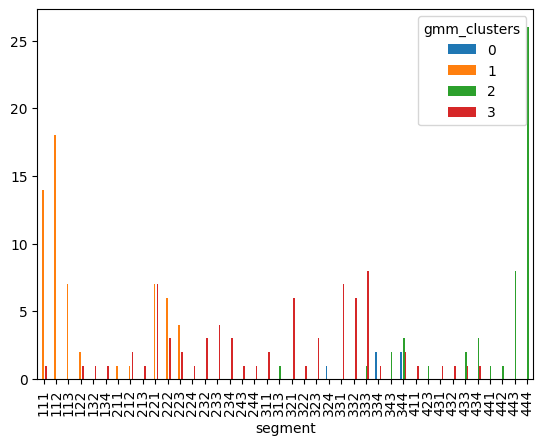

In [ ]:
pd.pivot_table(data, values="toplam_harcama",index="segment", columns="gmm_clusters", aggfunc="count").plot(kind="bar")

Text(0, 0.5, 'Recency')

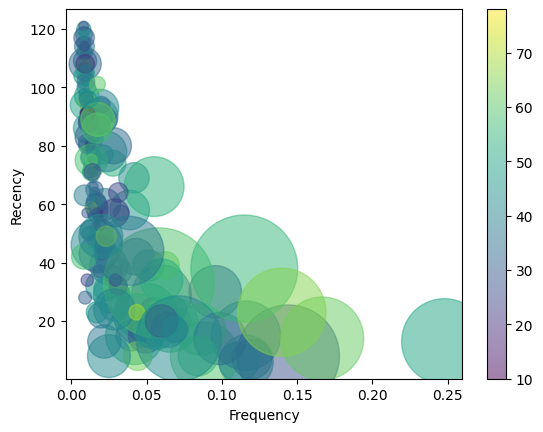

In [ ]:
plt.scatter(data.Frequency, data.Recency, s=data.Monetary, c=data.yas, alpha=0.5)
plt.colorbar()
plt.xlabel("Frequency")
plt.ylabel("Recency")

In [ ]:
data.Monetary = data.toplam_harcama

<ipython-input-64-94c230678f8c>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.Monetary = data.toplam_harcama


Text(0, 0.5, 'Recency')

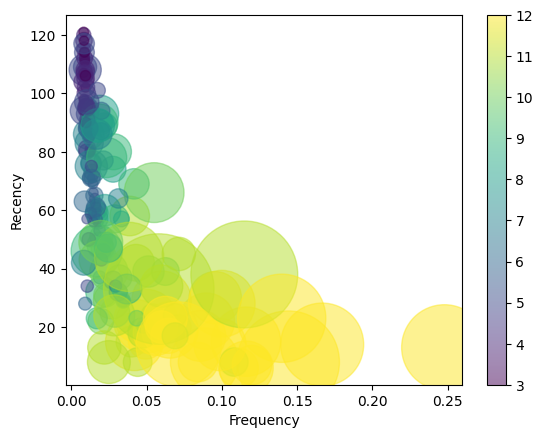

In [ ]:
plt.scatter(data.Frequency, data.Recency, s=data.Monetary, c=data.rfm_score, alpha=0.5)
plt.colorbar()
plt.xlabel("Frequency")
plt.ylabel("Recency")

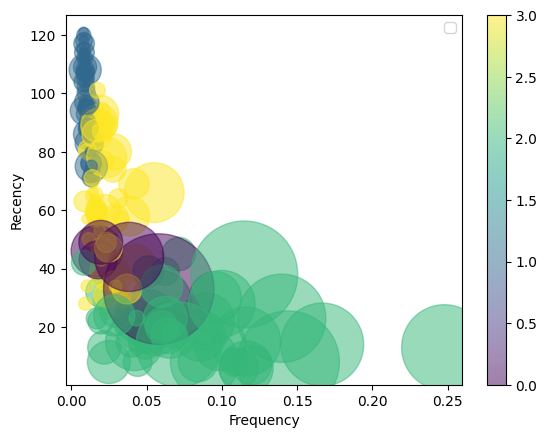

In [ ]:
plt.scatter(data.Frequency, data.Recency, s=data.Monetary, c=data.gmm_clusters, alpha=0.5)
plt.colorbar()
plt.xlabel("Frequency")
plt.ylabel("Recency")
plt.legend()

In [ ]:
data

,cinsiyet,yas,il,semt,uyelik_tarihi,ilk_satın_alma,son_satın_alma,sipariş_adedi,toplam_harcama,toplam_indirim_tutarı,...,age_segment,Frequency,R,T,F,M,segment,rfm_score,cluster,gmm_clusters
0,Erkek,35.0,İSTANBUL,SARIYER,2023-01-22,2023-02-26,2023-03-12,2,272.5,25,...,"(30.25, 37.0]",0.020000,3,B,3,3,333,9,0,3
1,Kadın,32.0,İSTANBUL,ŞİŞLİ,2023-01-22,2023-01-22,2023-04-17,4,494.5,25,...,"(30.25, 37.0]",0.040000,4,A,4,3,443,11,2,2
2,Erkek,19.0,İSTANBUL,ZEYTİNBURNU,2023-03-10,2023-03-26,2023-03-26,1,87.0,25,...,"(9.999, 30.25]",0.018868,3,B,3,1,331,7,2,3
3,Erkek,27.0,İSTANBUL,BAŞAKŞEHİR,2023-03-07,2023-03-07,2023-03-07,1,50.5,25,...,"(9.999, 30.25]",0.017857,3,B,3,1,331,7,0,3
4,Kadın,43.0,İSTANBUL,BEŞİKTAŞ,2023-01-15,2023-01-15,2023-01-15,1,47.0,25,...,"(37.0, 46.75]",0.009346,1,D,1,1,111,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,Kadın,42.0,İSTANBUL,MALTEPE,2023-01-20,2023-01-24,2023-03-14,2,996.5,25,...,"(37.0, 46.75]",0.019608,3,B,3,4,334,10,0,0
183,Erkek,62.0,İSTANBUL,ATAŞEHİR,2023-01-08,2023-01-08,2023-02-02,2,590.0,25,...,"(46.75, 78.0]",0.017544,2,C,2,4,224,8,1,3
184,Kadın,47.0,İSTANBUL,ATAŞEHİR,2023-01-25,2023-01-25,2023-01-25,1,309.0,25,...,"(46.75, 78.0]",0.010309,1,D,1,3,113,5,1,1
185,Kadın,60.0,İSTANBUL,BAŞAKŞEHİR,2023-01-07,2023-01-07,2023-01-21,2,129.5,25,...,"(46.75, 78.0]",0.017391,1,D,2,2,122,5,1,3


In [ ]:
pd.pivot_table(data, values="toplam_harcama",index="segment", columns=["age_segment","gmm_clusters"], aggfunc="count")

age_segment  (9.999, 30.25]          (30.25, 37.0]          (37.0, 46.75]     \
gmm_clusters              0  1  2  3             0  1  2  3             0  1   
segment                                                                        
111                       0  4  0  0             0  4  0  1             0  2   
112                       0  3  0  0             0  4  0  0             0  3   
113                       0  2  0  0             0  2  0  0             0  0   
122                       0  2  0  0             0  0  0  0             0  0   
132                       0  0  0  0             0  0  0  1             0  0   
134                       0  0  0  0             0  0  0  0             0  0   
211                       0  0  0  0             0  1  0  0             0  0   
212                       0  0  0  0             0  1  0  2             0  0   
213                       0  0  0  0             0  0  0  0             0  0   
221                       0  4  0  3             0  1  0  2             0  0   
222                       0  1  0  1             0  3  0  2             0  1   
223                       0  0  0  0             0  1  0  1             0  1   
224                       0  0  0  0             0  0  0  0             0  0   
232                       0  0  0  2             0  0  0  0             0  0   
233                       0  0  0  1             0  0  0  1             0  0   
234                       0  0  0  0             0  0  0  1             0  0   
243                       0  0  0  0             0  0  0  0             0  0   
244                       0  0  0  0             0  0  0  0             0  0   
311                       0  0  0  2             0  0  0  0             0  0   
313                       0  0  0  0             0  0  0  0             0  0   
321                       0  0  0  2             0  0  0  2             0  0   
322                       0  0  0  0             0  0  0  1             0  0   
323                       0  0  0  1             0  0  0  1             0  0   
324                       0  0  0  0             0  0  0  0             1  0   
331                       0  0  0  7             0  0  0  0             0  0   
332                       0  0  0  3             0  0  0  2             0  0   
333                       0  0  0  1             0  0  0  1             0  0   
334                       0  0  0  0             1  0  0  1             1  0   
343                       0  0  0  0             0  0  0  0             0  0   
344                       0  0  0  0             1  0  0  1             0  0   
411                       0  0  0  0             0  0  0  1             0  0   
423                       0  0  0  0             0  0  0  0             0  0   
431                       0  0  0  0             0  0  0  0             0  0   
432                       0  0  0  0             0  0  0  0             0  0   
433                       0  0  0  0             0  0  1  0             0  0   
434                       0  0  0  0             0  0  1  0             0  0   
441                       0  0  0  0             0  0  1  0             0  0   
442                       0  0  0  0             0  0  0  0             0  0   
443                       0  0  1  0             0  0  2  0             0  0   
444                       0  0  4  0             0  0  4  0             0  0   

age_segment        (46.75, 78.0]            
gmm_clusters  2  3             0  1   2  3  
segment                                     
111           0  0             0  4   0  0  
112           0  0             0  5   0  0  
113           0  0             0  2   0  0  
122           0  0             0  0   0  1  
132           0  0             0  0   0  0  
134           0  1             0  0   0  0  
211           0  0             0  0   0  0  
212           0  0             0  0   0  0  
213           0  1             0  0   0  0  
221           0  0 

In [ ]:
pd.pivot_table(data, values="AOV",index="segment", columns=["age_segment","gmm_clusters"], aggfunc="median")

age_segment  (9.999, 30.25]                         (30.25, 37.0]          \
gmm_clusters              1           2           3             0       1   
segment                                                                     
111                   47.50         NaN         NaN           NaN   48.20   
112                  105.00         NaN         NaN           NaN  144.00   
113                  248.75         NaN         NaN           NaN  369.75   
122                  121.25         NaN         NaN           NaN     NaN   
132                     NaN         NaN         NaN           NaN     NaN   
134                     NaN         NaN         NaN           NaN     NaN   
211                     NaN         NaN         NaN           NaN   57.00   
212                     NaN         NaN         NaN           NaN  125.00   
213                     NaN         NaN         NaN           NaN     NaN   
221                   47.00         NaN   50.000000           NaN   93.50   
222                  201.50         NaN  144.500000           NaN  193.00   
223                     NaN         NaN         NaN           NaN  412.00   
224                     NaN         NaN         NaN           NaN     NaN   
232                     NaN         NaN   86.625000           NaN     NaN   
233                     NaN         NaN  161.235000           NaN     NaN   
234                     NaN         NaN         NaN           NaN     NaN   
243                     NaN         NaN         NaN           NaN     NaN   
244                     NaN         NaN         NaN           NaN     NaN   
311                     NaN         NaN   64.825000           NaN     NaN   
313                     NaN         NaN         NaN           NaN     NaN   
321                     NaN         NaN   50.000000           NaN     NaN   
322                     NaN         NaN         NaN           NaN     NaN   
323                     NaN         NaN  229.500000           NaN     NaN   
324                     NaN         NaN         NaN           NaN     NaN   
331                     NaN         NaN   77.180000           NaN     NaN   
332                     NaN         NaN  170.000000           NaN     NaN   
333                     NaN         NaN  136.833333           NaN     NaN   
334                     NaN         NaN         NaN    750.000000     NaN   
343                     NaN         NaN         NaN           NaN     NaN   
344                     NaN         NaN         NaN    827.166667     NaN   
411                     NaN         NaN         NaN           NaN     NaN   
423                     NaN         NaN         NaN           NaN     NaN   
431                     NaN         NaN         NaN           NaN     NaN   
432                     NaN         NaN         NaN           NaN     NaN   
433                     NaN         NaN         NaN           NaN     NaN   
434                     NaN         NaN         NaN           NaN     NaN   
441                     NaN         NaN         NaN           NaN     NaN   
442                     NaN         NaN         NaN           NaN     NaN   
443                     NaN  139.000000         NaN           NaN     NaN   
444                     NaN  117.422652         NaN           NaN     NaN   

age_segment                          (37.0, 46.75]                             \
gmm_clusters           2           3             0      1       2           3   
segment                                                                         
111                  NaN   48.340000           NaN   46.0     NaN         NaN   
112                  NaN         NaN           NaN  141.0     NaN         NaN   
113                  NaN         NaN           NaN    NaN     NaN         NaN   
122                  NaN         NaN           NaN    NaN     NaN         NaN   
132                  NaN   76.250000           NaN    NaN     NaN         NaN   
134                  NaN         NaN    